In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
df_ = pd.read_csv("../input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv")
df = df_.copy()

In [3]:
df.shape

(4340, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.00000,2013.09078,4.21534,1992.00000,2011.00000,2014.00000,2016.00000,2020.00000
selling_price,4340.00000,504127.31175,578548.73614,20000.00000,208749.75000,350000.00000,600000.00000,8900000.00000
km_driven,4340.00000,66215.77742,46644.10219,1.00000,35000.00000,60000.00000,90000.00000,806599.00000


In [6]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
df["selling_price"] = df["selling_price"].apply(lambda x : int(x)) 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.00000,2013.09078,4.21534,1992.00000,2011.00000,2014.00000,2016.00000,2020.00000
selling_price,4340.00000,504127.31175,578548.73614,20000.00000,208749.75000,350000.00000,600000.00000,8900000.00000
km_driven,4340.00000,66215.77742,46644.10219,1.00000,35000.00000,60000.00000,90000.00000,806599.00000


In [9]:
df.insert(loc=0, column="brand", value=df.name.apply(lambda x : (x.split(' ')[0])))


In [10]:
df.head()

,brand,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
df.insert(loc=1, column="model", value=df.name.apply(lambda x : ' '.join(x.split(' ')[1:])))

In [12]:
df.head()

,brand,model,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,800 AC,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Wagon R LXI Minor,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Verna 1.6 SX,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,RediGO T Option,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Amaze VX i-DTEC,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [13]:
df.drop("name", inplace=True, axis=1)


In [14]:
df.head()

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [15]:
df["brand"].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: brand, dtype: int64

In [16]:
top10_brands = df["brand"].value_counts()[0:10]
#top10_brands = pd.DataFrame(df["brand"].value_counts()[0:10].reset_index())
top10_brands.head()

Maruti      1280
Hyundai      821
Mahindra     365
Tata         361
Honda        252
Name: brand, dtype: int64

In [17]:
df_modelcounts = pd.DataFrame(df[["brand","model"]].value_counts()).sort_values(by="brand").reset_index()
df_modelcounts["count"] = df_modelcounts[0]
df_modelcounts.drop(0,axis = 1, inplace = True)
df_modelcounts.head()

,brand,model,count
0,Ambassador,Classic 2000 Dsz,1
1,Ambassador,CLASSIC 1500 DSL AC,2
2,Ambassador,Grand 1800 ISZ MPFI PW CL,1
3,Audi,A4 3.0 TDI Quattro,12
4,Audi,RS7 2015-2019 Sportback Performance,1


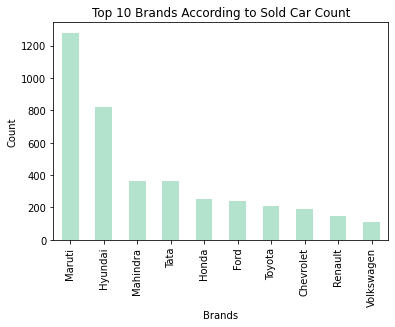

In [18]:
df["brand"].value_counts().head(10).plot(kind="bar",colormap= 'Pastel2')
plt.xlabel("Brands",fontsize=10,color="black")
plt.ylabel("Count",fontsize=10,color="black")
plt.title("Top 10 Brands According to Sold Car Count",color="black")
plt.show()

<AxesSubplot:>

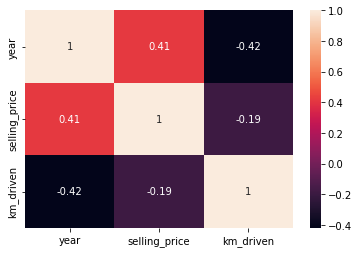

In [19]:
sns.heatmap(df.corr(), annot=True)

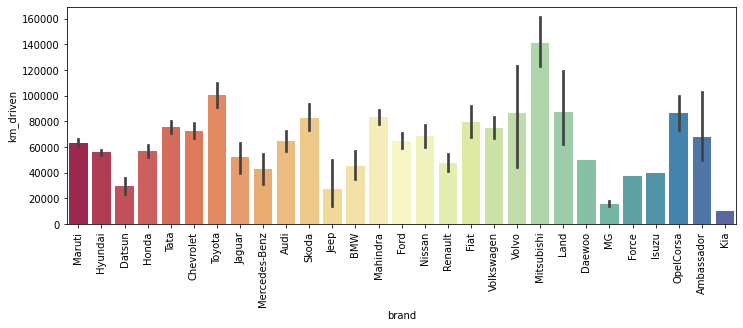

In [20]:
plt.figure(figsize = (12,4))
sns.barplot(x="brand",y="km_driven", data=df, palette = "Spectral");
plt.xticks(rotation = 90)
plt.show()

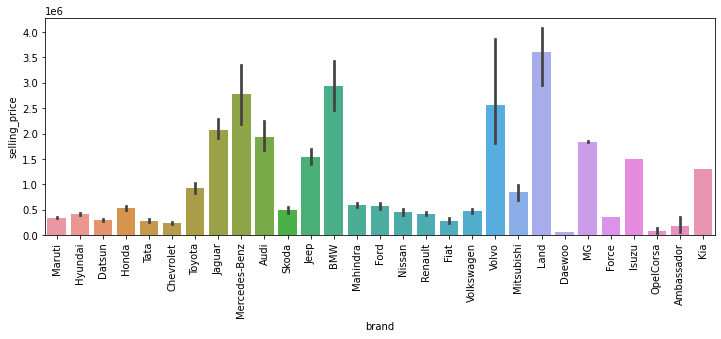

In [21]:
plt.figure(figsize = (12,4))
sns.barplot(x="brand",y="selling_price", data=df);
plt.xticks(rotation = 90)
plt.show()

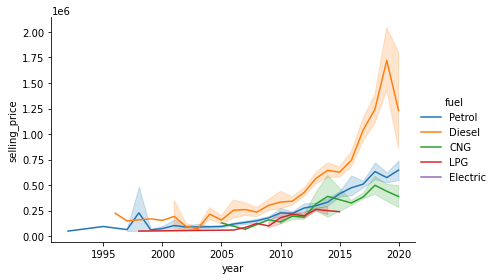

In [22]:
sns.relplot(data=df, x=df["year"], y="selling_price",hue="fuel",kind="line", 
    height=4, aspect=1.5, facet_kws=dict(sharex=False));

In [23]:
df1= df.groupby(["brand","transmission"]).size().reset_index().rename(columns = {0 : "transmission_count"})
df1.head()

,brand,transmission,transmission_count
0,Ambassador,Manual,4
1,Audi,Automatic,60
2,BMW,Automatic,39
3,Chevrolet,Automatic,5
4,Chevrolet,Manual,183


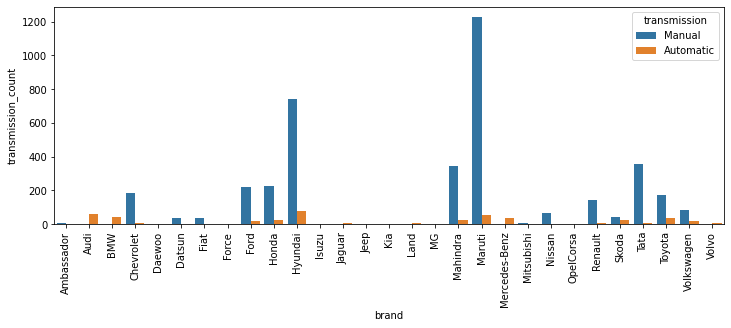

In [24]:
plt.figure(figsize = (12,4))
sns.barplot(x="brand", y="transmission_count", hue="transmission", data=df1);
plt.xticks(rotation = 90)
plt.show()

In [25]:
seller_type = df['seller_type'].value_counts(dropna = False)
seller_type

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


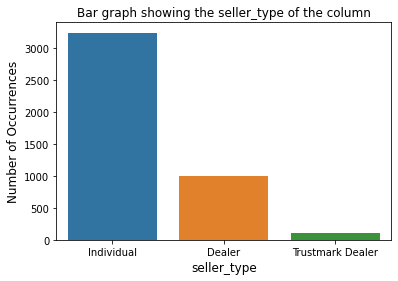

In [26]:
sns.barplot(seller_type.index, seller_type.values)
plt.title('Bar graph showing the seller_type of the column')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('seller_type', fontsize = 12)
plt.show()

In [27]:
owner = df['owner'].value_counts(dropna = False)
owner

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


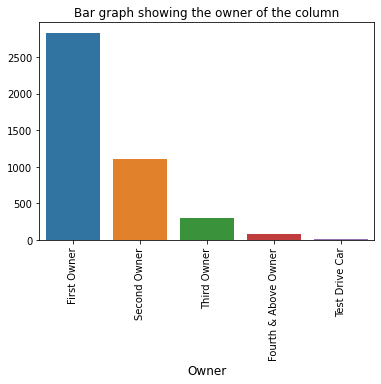

In [28]:
sns.barplot(owner.index, owner.values)
plt.title('Bar graph showing the owner of the column')
plt.xlabel('Owner', fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

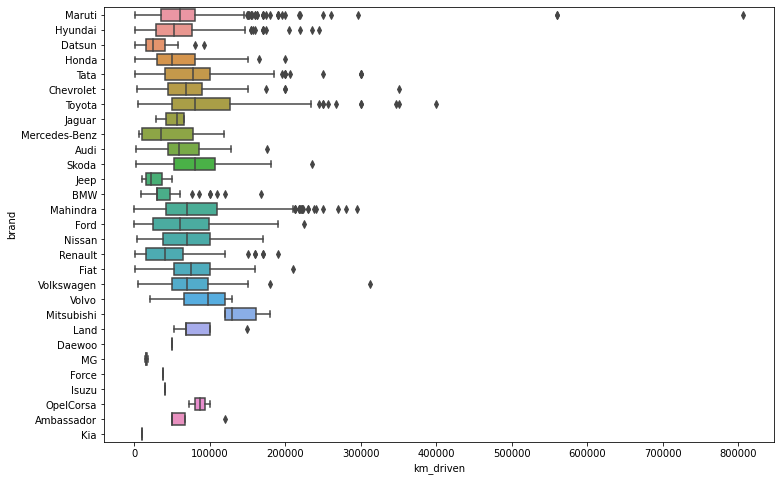

In [29]:
plt.figure(figsize = (12,8))
sns.boxplot(y='brand', x='km_driven', data = df)
plt.show()